# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [2]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [3]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [4]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

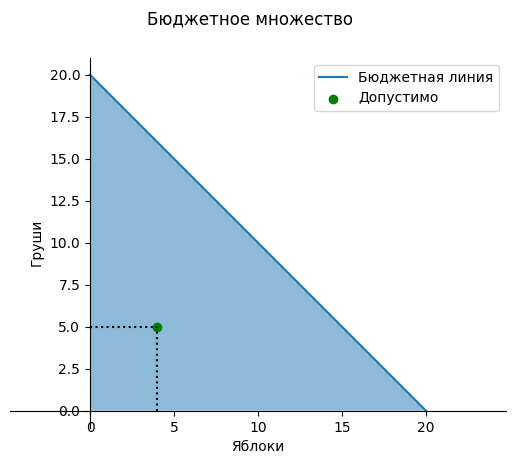

In [5]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [6]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [7]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [8]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [9]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [10]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [11]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [12]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

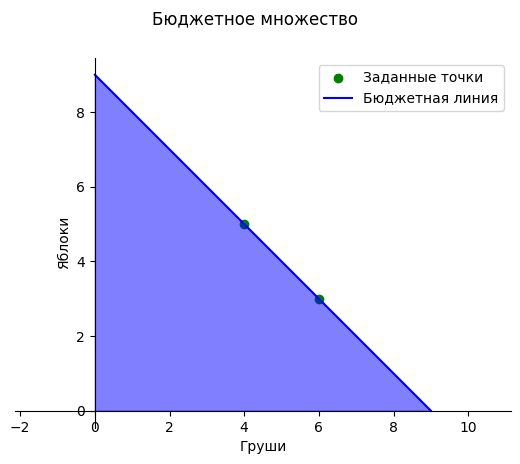

In [13]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [14]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…


### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [15]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

$$
\begin{cases}
p_1 a_{1,1} + \ldots + p_n a_{1,n} = 1\\
p_1 a_{2,1} + \ldots + p_n a_{2,n} = 1\\
p_1 a_{n,1} + \ldots + p_n a_{n,n} = 1\\
\end{cases}
$$



Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1}& \dots  & a_{1,n} \\
    \vdots& \ddots & \vdots\\
    a_{n,1}& \dots & a_{n,n}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    \vdots\\
    p_n
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    \vdots\\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        \vdots\\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1}& \dots  & a_{1,n} \\
    \vdots& \ddots & \vdots\\
    a_{n,1}& \dots & a_{n,n}
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    \vdots\\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [16]:
def get_goods_parameters(list_of_points: np.array):
    
    n = len(list_of_points)
    ones = np.ones([n,1]) # матрица nx1 из единиц 
    
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

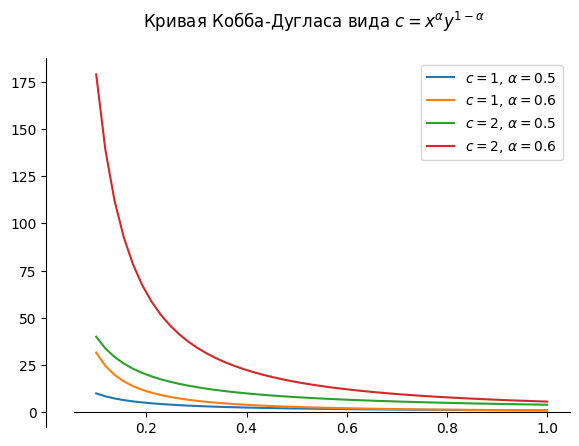

In [17]:

def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

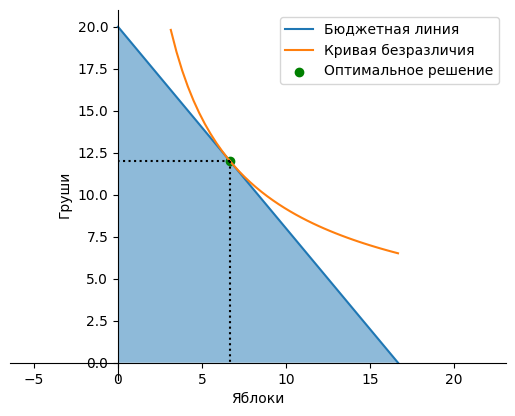

In [18]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [19]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

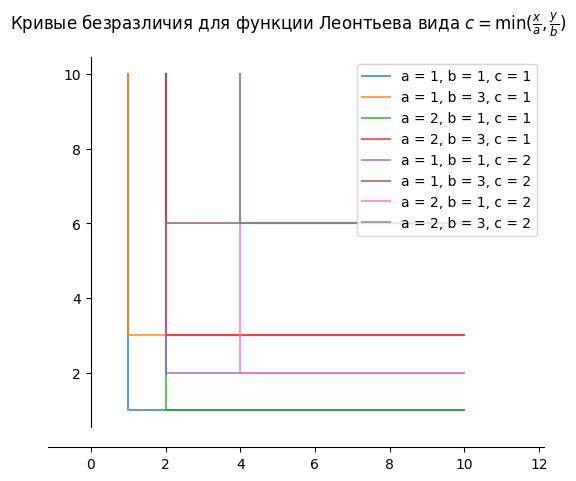

In [20]:
def plot_Leontev(a_values, b_values, c_values):
    fig, ax = plt.subplots()
    fig.suptitle("Кривые безразличия для функции Леонтьева вида $с = \\min(\\frac{x}{a}, \\frac{y}{b})$") 

    for c in c_values:
        for a in a_values:
            for b in b_values:
                # строим "уголки" по 3 точкам
                x_values = [a * c, a * c, 10]
                y_values = [10, b * c, b * c]
                ax.plot(x_values, y_values, label = f'a = {a}, b = {b}, c = {c}', alpha=0.7)

                
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

a_values = [1, 2]
b_values = [1, 3]
c_values = [1, 2]
plot_Leontev(a_values, b_values, c_values)


### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

Оптимальным решением при функции полезности Леонтьева является точка касания "уголка" и бюджетного ограничения, поскольку, если БО и "уголок" с заданным уровнем полезности пересекаются, то можно поднимать уголок, увеличивая уровень полезности при этом, пока они не начнут касаться.

В точке касания $c = \frac{x}{a} = \frac{y}{b} \Rightarrow y = \frac{bx}{a}$

Подставим в БО: $p_x x + p_y y = p_x x + p_y \frac{bx}{a} = I$

$x^* = \frac{I}{p_x + \frac{p_y b}{a}}$

$y^* = \frac{I b}{a(p_x + \frac{p_y b}{a})} = \frac{I b}{a p_x + p_y b}$

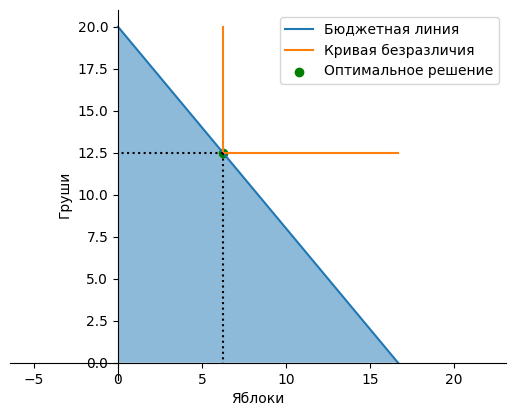

In [21]:
def budget_Leontev_solution(g1, g2, budget, a, b):
    x_solution = budget/(g1.price + g2.price * b / a)
    y_solution = budget * b / (a * g1.price + b * g2.price)
    return x_solution, y_solution, x_solution / a


def plot_budget_Leontev(g1, g2, budget, a, b):
    x_solution, y_solution, c = budget_Leontev_solution(g1, g2, budget, a, b)

    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = [x_solution, x_solution, budget/g1.price]
    y_values = [budget/g2.price, y_solution, y_solution]
    ax.plot(x_values, y_values, label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()


g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [22]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [23]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [24]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    costs = g1.price * max(0, x1 - g1.free) + g2.price * max(0, x2 - g2.free)
    if costs < budget:
        return 1
    elif is_equal(costs, budget):
        return 0
    else:
        return -1

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

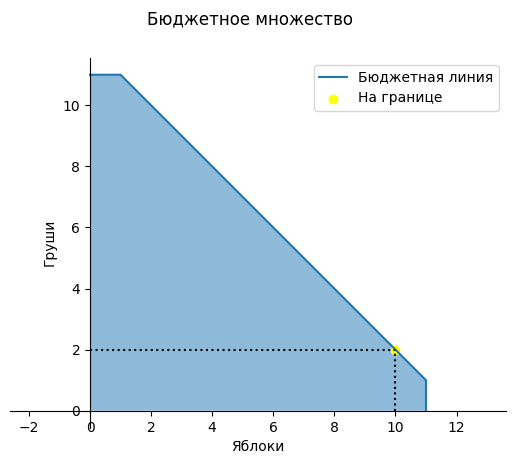

In [25]:
def plot_budget(g1: Good, g2: Good, budget, x, y):

    # строим БО по 4 ключевым точкам
    x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price  + g2.free,  budget/g2.price  + g2.free, g2.free, 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [26]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [27]:
# columns=['g1_name', 'g1_price', 'g1_free', 'g1_quantity', 'g2_name', 'g2_price', 'g2_free', 'g2_quantity', 'budget']

# data = [
# ['манго', 3, 2, 4, 'персик', 2, 1, 2, 10],
# ['клубника', 3, 2, 4, 'малина', 1, 2, 2, 10],
# ['огурец', 3, 2, 4, 'картофель', 2, 3, 2, 1],
# ['картофель', 3, 2, 4, 'свекла', 1, 2, 1, 2], 
# ['манго', 3, 2, 2, 'маракуйя', 2, 2, 2, 6],
# ['банан', 3, 1, 4, 'сливки', 2, 7, 3, 2],
# ['хлеб', 3, 2, 4, 'колбаса', 2, 5, 2, 10],
# ['творог', 3, 2, 4, 'йогурт', 10, 2, 1, 11],
# ['йогурт', 3, 2, 1, 'колбаса', 2, 1, 0, 3],
# ['масло', 1, 2, 1, 'хлеб', 2, 2, 2, 10],
# ['малина', 3, 1, 4, 'смородина', 2, 2, 2, 9],
# ['облепиха', 3, 2, 2, 'крыжовник', 2, 2, 2, 8]
# ]

# dt = pd.DataFrame(data, columns=columns)
# dt.to_csv('model2_data.csv', index=False)

Данные можно скачать по ссылке: https://disk.yandex.ru/d/SC-irco7zGGAPA

In [28]:
df = pd.read_csv('model2_data.csv')
df

,g1_name,g1_price,g1_free,g1_quantity,g2_name,g2_price,g2_free,g2_quantity,budget
0,манго,3,2,4,персик,2,1,2,10
1,клубника,3,2,4,малина,1,2,2,10
2,огурец,3,2,4,картофель,2,3,2,1
3,картофель,3,2,4,свекла,1,2,1,2
4,манго,3,2,2,маракуйя,2,2,2,6
5,банан,3,1,4,сливки,2,7,3,2
6,хлеб,3,2,4,колбаса,2,5,2,10
7,творог,3,2,4,йогурт,10,2,1,11
8,йогурт,3,2,1,колбаса,2,1,0,3
9,масло,1,2,1,хлеб,2,2,2,10


In [29]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df

    # Для каждой строки создаем продукты
    g1 = Good(row['g1_name'], row['g1_price'], row['g1_free']) 
    g2 = Good(row['g2_name'], row['g2_price'], row['g2_free'])

    result.append(budget_test(g1, g2, row['budget'], row['g1_quantity'], row['g2_quantity']))

df["result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,g1_name,g1_price,g1_free,g1_quantity,g2_name,g2_price,g2_free,g2_quantity,budget,result
0,манго,3,2,4,персик,2,1,2,10,1
1,клубника,3,2,4,малина,1,2,2,10,1
2,огурец,3,2,4,картофель,2,3,2,1,-1
3,картофель,3,2,4,свекла,1,2,1,2,-1
4,манго,3,2,2,маракуйя,2,2,2,6,1
5,банан,3,1,4,сливки,2,7,3,2,-1
6,хлеб,3,2,4,колбаса,2,5,2,10,1
7,творог,3,2,4,йогурт,10,2,1,11,1
8,йогурт,3,2,1,колбаса,2,1,0,3,1
9,масло,1,2,1,хлеб,2,2,2,10,1


In [30]:
df_super = df[df["result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,g1_name,g1_price,g1_free,g1_quantity,g2_name,g2_price,g2_free,g2_quantity,budget,result
0,манго,3,2,4,персик,2,1,2,10,1
1,клубника,3,2,4,малина,1,2,2,10,1
4,манго,3,2,2,маракуйя,2,2,2,6,1
6,хлеб,3,2,4,колбаса,2,5,2,10,1
7,творог,3,2,4,йогурт,10,2,1,11,1
8,йогурт,3,2,1,колбаса,2,1,0,3,1
9,масло,1,2,1,хлеб,2,2,2,10,1
10,малина,3,1,4,смородина,2,2,2,9,0
11,облепиха,3,2,2,крыжовник,2,2,2,8,1


In [31]:
df_super = df_super.sort_values(by = 'g1_free') # Сортируем датафрейм по столбцу g1_free и сохраняем в тот же датафрейм
df_super

,g1_name,g1_price,g1_free,g1_quantity,g2_name,g2_price,g2_free,g2_quantity,budget,result
10,малина,3,1,4,смородина,2,2,2,9,0
0,манго,3,2,4,персик,2,1,2,10,1
1,клубника,3,2,4,малина,1,2,2,10,1
4,манго,3,2,2,маракуйя,2,2,2,6,1
6,хлеб,3,2,4,колбаса,2,5,2,10,1
7,творог,3,2,4,йогурт,10,2,1,11,1
8,йогурт,3,2,1,колбаса,2,1,0,3,1
9,масло,1,2,1,хлеб,2,2,2,10,1
11,облепиха,3,2,2,крыжовник,2,2,2,8,1


In [32]:
df_super.to_csv("model2_result.csv") # Сохраняем 

Результат можно скачать по ссылке: https://disk.yandex.ru/d/Kp1Y9HJvVP2tFw

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

Онормируем бюджет к 1, цены - доли бюджета

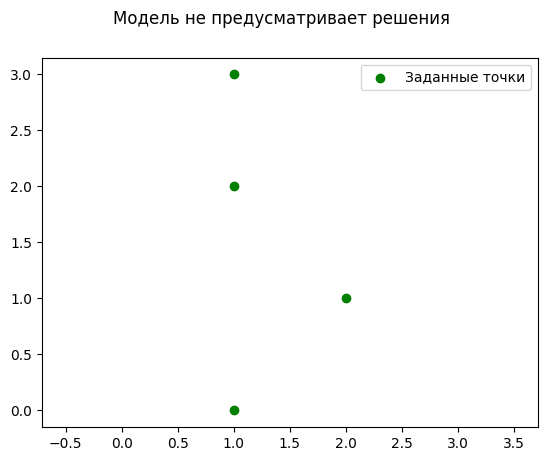

In [33]:

def plot_goods_parameters(points):
    fig, ax = plt.subplots() # Создаем фигуру

    # сортируем точки по возрастанию х, убыванию у
    sorted_points = sorted(points, key=lambda x : (x[0], -x[1]))
    f = 1  # 1 - решение существует, 0 - нет

    # Для существования решения после сортировки по х точки должны не возрастать по у
    if not (sorted_points[0][1] >= sorted_points[1][1] >= sorted_points[2][1] >= sorted_points[3][1]):
        f = 0

    points = np.array(points)
    x_values = points.T[0]
    y_values = points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными
    angles = [0] * 3

    inf = 10 ** 9

    # рассчитываем углы наклона каждого участка
    for i in range(3):
        delta_y = abs(sorted_points[i][1] - sorted_points[i + 1][1])
        delta_x = abs(sorted_points[i][0] - sorted_points[i + 1][0])
        angles[i] = delta_y / delta_x if delta_x != 0 else inf

    # рассматриваем все возможные случаи
    if angles[0] == angles[1] == angles[2]:
        if angles[0] == 0:
            x_free = sorted_points[3][0]
            y_free = 0
            x_price = 1 / sorted_points[0][1]  # делаем наклон 1:1, y_max = points[0][1]
            y_price = 1 / sorted_points[0][1]
            # x_points = [0, x_free, x_free + sorted_points[0][1]]
            # y_points = [sorted_points[0][1], sorted_points[0][1], 0]
        elif angles[0] == inf:
            x_free = 0
            y_free = sorted_points[0][1]
            x_price = 1 / sorted_points[0][0] # делаем наклон 1:1, x_max = points[0][0]
            y_price = 1 / sorted_points[0][0]
            # x_points = [0, sorted_points[0][0], sorted_points[0][0]]
            # y_points = [y_free + sorted_points[0][0], y_free, 0]
        else:
            y_max = sorted_points[0][1] + angles[0] * sorted_points[0][0]
            x_max = y_max / angles[0]
            x_free = 0
            y_free = 0
            x_price = 1/x_max
            y_price = 1/y_max
            # x_points = [0, x_max]
            # y_points = [y_max, 0]
    elif angles[0] == angles[1] and angles[1] < angles[2]:
        if angles[0] == 0 and angles[2] < inf:
            x_free = sorted_points[2][0]
            y_free = sorted_points[3][1]
            x_buy_max = sorted_points[3][0] - x_free
            y_buy_max = sorted_points[2][1] - y_free
            x_price = 1/x_buy_max
            y_price = 1/y_buy_max
            # x_points = [0, x_free, x_free + x_buy_max, x_free + x_buy_max]
            # y_points = [y_free + y_buy_max, y_free + y_buy_max,  y_free, 0]
        elif angles[0] != 0 and angles[2] == inf:
            x_free = sorted_points[0][0]
            y_free = sorted_points[2][1]
            x_buy_max = sorted_points[2][0] - x_free
            y_buy_max = sorted_points[0][1] - y_free
            x_price = 1/x_buy_max
            y_price = 1/y_buy_max
            # x_points = [0, x_free, x_free + x_buy_max, x_free + x_buy_max]
            # y_points = [y_free + y_buy_max, y_free + y_buy_max,  y_free, 0]
        else:
            f = 0
    elif angles[0] < angles[1] and angles[1] == angles[2]:
        if angles[0] == 0 and angles[2] < inf:
            x_free = sorted_points[1][0]
            y_free = sorted_points[3][1]
            x_buy_max = sorted_points[3][0] - x_free
            y_buy_max = sorted_points[0][1] - y_free
            x_price = 1/x_buy_max
            y_price = 1/y_buy_max
            # x_points = [0, x_free, x_free + x_buy_max, x_free + x_buy_max]
            # y_points = [y_free + y_buy_max, y_free + y_buy_max,  y_free, 0]
        elif angles[0] != 0 and angles[2] == inf:
            x_free = sorted_points[0][0]
            y_free = sorted_points[1][1]
            x_buy_max = sorted_points[1][0] - x_free
            y_buy_max = sorted_points[0][1] - y_free
            x_price = 1/x_buy_max
            y_price = 1/y_buy_max
            # x_points = [0, x_free, x_free + x_buy_max, x_free + x_buy_max]
            # y_points = [y_free + y_buy_max, y_free + y_buy_max,  y_free, 0]
        else:
            f = 0
    elif angles[0] < angles[1] < angles[2]:
        b = angles[1] * sorted_points[1][0] + sorted_points[1][1] # константа из уравнения y = b - ax
        x_free = (b - sorted_points[0][1]) / angles[1]
        y_free = b - angles[1] * sorted_points[3][0]
        x_buy_max = sorted_points[3][0] - x_free
        y_buy_max = sorted_points[0][1] - y_free
        x_price = 1/x_buy_max
        y_price = 1/y_buy_max
    else:
        f = 0

    if f == 0:
        fig.suptitle("Модель не предусматривает решения")
    else:
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", x_price, x_free)
        g2 = Good("Яблоки", y_price, y_free)
        budget = 1
        x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
        y_points = [budget/g2.price  + g2.free,  budget/g2.price  + g2.free, g2.free, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()

points = [[1, 0], [2, 1], [1, 2], [1, 3]]
plot_goods_parameters(points)


In [34]:
def interactive_plot(a11, a12, a21, a22, a31, a32, a41, a42):
    list_of_points = [
        [a11, a12],
        [a21, a22],
        [a31, a32],
        [a41, a42]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, a11=(1, 10), a12 = (1, 10), a21=(1, 10), a22 = (1, 10),a31 = (1, 10), a32 = (1, 10), a41 = (1, 10), a42 = (1, 10));

interactive(children=(IntSlider(value=5, description='a11', max=10, min=1), IntSlider(value=5, description='a1…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

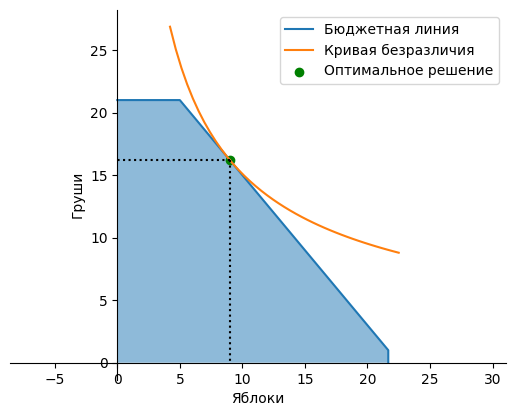

In [35]:
def Cobb_Douglas(x, c, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    new_budget = g1.price * g1.free + g2.price * g2.free + budget  # бюджет с учетом бесплатной чсасти (реально доступны не все точки)
    x_possible_solution = alpha*new_budget/g1.price # находим точку касания без учета ограничений
    y_possible_solution = (1-alpha)*new_budget/g2.price

    x_max = budget / g1.price  # сколько максимально можно купить каждого товара без учета бесплатной части
    y_max = budget / g2.price

    # проверяем выход за границы
    if x_possible_solution > x_max + g1.free:
        x_solution = x_max + g1.free
        y_solution = g2.free
    elif g1.free <= x_possible_solution <= x_max + g1.free:
        x_solution = x_possible_solution
        y_solution = y_possible_solution
    else:
        x_solution = g1.free
        y_solution = g2.free + y_max

    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)


def plot_budget_Cobb_Douglas(g1: Good, g2: Good, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    # строим БО по ключевым точкам
    x_points = [0, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price  + g2.free,  budget/g2.price  + g2.free, g2.free, 0]

    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    new_budget = g1.price * g1.free + g2.price * g2.free + budget

    x_values = np.linspace(0.1, new_budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < new_budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6, 5)
g2 = Good("Груши", 5, 1)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [36]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [37]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, threshold, price1, price2):
        self.threshold = threshold
        self.name = name
        self.price1 = price1
        self.price2 = price2
    
    def price(self, quantity):
        return min(self.threshold, quantity) * self.price1 + max(quantity - self.threshold, 0) * self.price2
    
    def quantity(self, budget):
        price1_part = min(self.threshold, budget / self.price1) # то, сколько сможем купить по 1ой цене
        return price1_part + (budget - self.price1 * price1_part) / self.price2


g1 = Good("mango", 3, 10, 5)
print(g1.price(5))
print(g1.quantity(35))


40
4.0


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [38]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = g1.price(x1) + g2.price(x2)
    if (is_equal(result, budget)):
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

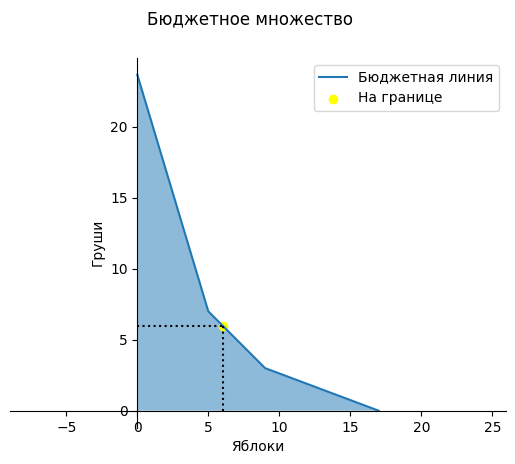

In [39]:
# Вся плоскость разбивается на 4 зоны с соотвествующими ценами на товары. 
#Будем строить БО по точкам, принципиально разных расположений БО по зонам всего три. Рассмотрим их:

def plot_budget(g1: Good, g2: Good, budget, x, y):

    y_max = g2.quantity(budget)
    x_max = g1.quantity(budget)

    if y_max > g2.threshold:
        if g2.quantity(budget - g1.threshold * g1.price1) > g2.threshold:  # выше точки пересечения 2ух трешхолжов
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold * g2.price1), x_max]
            y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), g2.threshold, 0]
        else: # ниже точки пересечения
            x_points = [0, g1.quantity(budget - g2.threshold * g2.price1), g1.threshold, x_max]
            y_points = [y_max, g2.threshold, g2.quantity(budget - g1.threshold * g1.price1), 0]
    else: # максимальный у ниже трешхолда
        x_points = [0, g1.threshold, x_max]
        y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), 0]

    
    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    filt_x_point = []
    filt_y_point = []
    for i in range(len(x_points)):
        if x_points[i] >= 0 and y_points[i] >= 0:
            filt_x_point.append(x_points[i])
            filt_y_point.append(y_points[i])


    ax.plot(filt_x_point, filt_y_point, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
plot_budget(g1, g2, budget, 6, 6)


In [40]:
def interactive_plot(t1, p11, p12, t2, p21, p22, budget, x, y):
    g1 = Good("Яблоки", t1, p11, p12) # Создаем первый товар с ценой p1
    g2 = Good("Груши", t2, p21, p22) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x, y);


interact(interactive_plot, t1=(1, 10), p11=(1, 10), p12=(1, 10), t2=(1, 10), p21 = (1, 10), p22=(1, 10), budget=(1,100), x = (1,10), y=(1,10))

interactive(children=(IntSlider(value=5, description='t1', max=10, min=1), IntSlider(value=5, description='p11…

<function __main__.interactive_plot(t1, p11, p12, t2, p21, p22, budget, x, y)>

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

В данной модели для того, чтобы существовало решение, достаточно, чтобы при сортировке точек по x по возрастанию их координаты по y наоборот строго убывали. В таком случае будем строить БО таким образом, что x-координата 2ой точки станет трешхолдом по x, y-координата 3ей точки станет трешхолдом по у, а участки БО определятся однозначно, поскольку будем брать подряд идущие пары точек и проводить через них прямую.

Отнормируем  бюджет к 1, чтобы было удобнее работать. Составим систему линейных уравнений с 4 неизвестными по 4 заданным точкам, зная, что они лежат на БО:

$p_x^1 x_0 + p_x^2 * 0 + p_y^1 ty + p_y^2 (y_0 - ty) = 1\\
p_x^1 tx + p_x^2 * 0 + p_y^1 ty + p_y^2 (y_1 - ty) = 1\\
p_x^1 tx + p_x^2 (x_2 - tx) + p_y^1 ty + p_y^2 * 0 = 1\\
p_x^1 tx + p_x^2 (x_3 - tx) + p_y^1 y_3 + p_y^2 * 0 = 1$

Составим матрицу из данных коэффициентов:

$$
\begin{pmatrix}
    x_0 & 0 & ty & (y_0 - ty) \\
    tx & 0 & ty & (y_1 - ty) \\
    tx & (x_2 - tx) & ty & 0 \\
    tx & (x_3 - tx) & y_3 & 0
\end{pmatrix}
\begin{pmatrix}
    p_x^1 \\
    p_x^2 \\
    p_y^1 \\
    p_y^2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1 \\
    1 \\
    1
\end{pmatrix}
$$

$X = A^{-1}b$

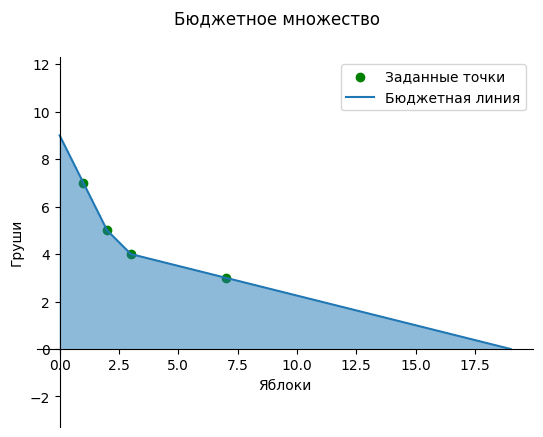

In [41]:

def plot_goods_parameters(points):
    fig, ax = plt.subplots() # Создаем фигуру

    set_points = set(points) # обрабатываем случай, когда точки накладываются
    sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))
    sorted_points = sorted(points, key=lambda x : (x[0], -x[1]))

    points = np.array(points)  # оставляем изначальные точки для нанесения на график
    x_values_real = points.T[0]
    y_values_real = points.T[1]
    
    f = 1  # 1 - существует БО при заданных точках, 0 - не существует

    for i in range(len(sorted_set_points) - 1):
        if not (sorted_set_points[i][1] > sorted_set_points[i + 1][1]):
            f = 0 # проверяем, что после сортировки по x-координате, по y-координате точки убывают

    # обрабатываем склеивающиеся точки
    if len(sorted_set_points) == 3:
        set_points.add(((sorted_set_points[0][0] + sorted_set_points[1][0]) / 2, (sorted_set_points[0][1] + sorted_set_points[1][1]) / 2))
        sorted_set_points = sorted(set_points)
    elif len(sorted_set_points) == 2:
        set_points.add(((sorted_set_points[0][0] + sorted_set_points[1][0]) / 2, (sorted_set_points[0][1] + sorted_set_points[1][1]) / 2))
        sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))
        set_points.add(((sorted_set_points[0][0] + sorted_set_points[1][0]) / 2, (sorted_set_points[0][1] + sorted_set_points[1][1]) / 2))
        sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))
    elif len(sorted_set_points) == 1:
        if sorted_set_points[0][1] == 0:
            set_points.add((sorted_set_points[0][0] - 0.5, sorted_set_points[0][1] + 0.5))
        else:
            set_points.add((sorted_set_points[0][0] + 0.5, sorted_set_points[0][1] - 0.5))
        sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))
        set_points.add(((sorted_set_points[0][0] + sorted_set_points[1][0]) / 2, (sorted_set_points[0][1] + sorted_set_points[1][1]) / 2))
        sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))
        set_points.add(((sorted_set_points[0][0] + sorted_set_points[1][0]) / 2, (sorted_set_points[0][1] + sorted_set_points[1][1]) / 2))
        sorted_set_points = sorted(set_points, key=lambda x : (x[0], -x[1]))


    sorted_points = np.array(sorted_set_points)
    x_values = sorted_points.T[0]
    y_values = sorted_points.T[1]

    if f:
        tx = x_values[1]
        ty = y_values[2]
        
        a = [[x_values[0], 0, ty, (y_values[0] - ty)], [tx, 0, ty, (y_values[1] - ty)], [tx, (x_values[2] - tx), ty, 0], [tx, (x_values[3] - tx), y_values[3], 0]]
        try:
            p = np.linalg.inv(a) @ np.ones(4)
            if min(p) <= 0:
                f = 0
        except:
            f = 0

    ax.scatter(x_values_real, y_values_real, label="Заданные точки", color="green")      
    ax.axis('equal') # Принудительно делаем оси равными

    if f == 0:
        fig.suptitle("Модель не предусматривает решения")
    else:
        fig.suptitle("Бюджетное множество")
        g1 = Good("Яблоки", tx, p[0], p[1]) # Создаем первый товар с ценой p1
        g2 = Good("Груши", ty, p[2], p[3]) 
        budget = 1
        
        # рассматриваем 3 случая прохождения через 4 ценовые зоны
        y_max = g2.quantity(budget)
        x_max = g1.quantity(budget)
        if y_max > g2.threshold:
            if g2.quantity(budget - g1.threshold * g1.price1) > g2.threshold:
                x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold * g2.price1), x_max]
                y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), g2.threshold, 0]
            else:
                x_points = [0, g1.quantity(budget - g2.threshold * g2.price1), g1.threshold, x_max]
                y_points = [y_max, g2.threshold, g2.quantity(budget - g1.threshold * g1.price1), 0]
        else:
            x_points = [0, g1.threshold, x_max]
            y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), 0]

        filt_x_point = []
        filt_y_point = []
        for i in range(len(x_points)):
            if x_points[i] >= 0 and y_points[i] >= 0:
                filt_x_point.append(x_points[i])
                filt_y_point.append(y_points[i])


        ax.plot(filt_x_point, filt_y_point, label="Бюджетная линия") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
        
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)
        
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()

points = [(1, 7), (2, 5), (3, 4), (7, 3)]
plot_goods_parameters(points)


In [42]:
def interactive_plot(a11, a12, a21, a22, a31, a32, a41, a42):
    list_of_points = [
        (a11, a12),
        (a21, a22),
        (a31, a32),
        (a41, a42)
    ]
    plot_goods_parameters(list_of_points)

interact(interactive_plot, a11=(1, 10), a12 = (1, 10), a21=(1, 10), a22 = (1, 10),a31 = (1, 10), a32 = (1, 10), a41 = (1, 10), a42 = (1, 10));

interactive(children=(IntSlider(value=5, description='a11', max=10, min=1), IntSlider(value=5, description='a1…

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

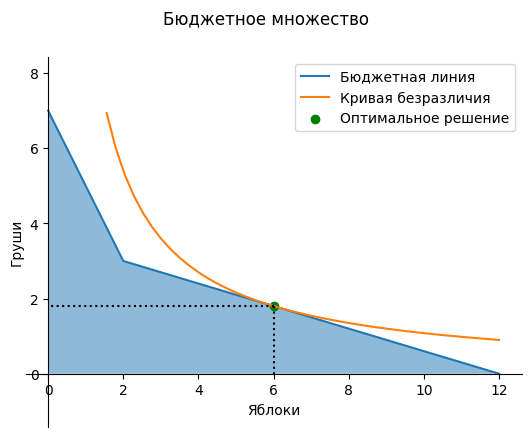

In [56]:
def Cobb_Douglas(x, c, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))


# находим такой бюджет, какой необходимо было бы иметь, чтобы при константных ценах БО проходило через заданную точку
def new_budget(x0, y0, px, py):
    return x0 * px + y0 * py


# поиск решения для лиинейного БО и полезности Кобба-Дугласа с заданными ценами и ограничениями
def solution(alpha, budget, price_x, price_y, xtl, xtr, ytu, ytd):  # xtr, xtl - ограничения линейного участка на х, ytu, ytd - ограничения на y
    xs = alpha*budget/price_x
    ys =  (1-alpha)*budget/price_y

    # проверяем выход за границы
    if xs < xtl:
        xs = xtl
        ys = ytu
    elif xs > xtr:
        xs = xtr
        ys = ytd

    return xs, ys, math.pow(xs, alpha)*math.pow(ys, 1-alpha)


def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    y_max = g2.quantity(budget)
    x_max = g1.quantity(budget)

    # рассматриваем 3 случая прохождения через 4 ценовые зоны
    if y_max > g2.threshold:
        if g2.quantity(budget - g1.threshold * g1.price1) > g2.threshold:
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold * g2.price1), x_max]
            y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), g2.threshold, 0]

            # оставляем точки только с положительными координатами
            filt_x_point = []
            filt_y_point = []
            for i in range(len(x_points)):
                if x_points[i] >= 0 and y_points[i] >= 0:
                    filt_x_point.append(x_points[i])
                    filt_y_point.append(y_points[i])
                        
            x_points = filt_x_point
            y_points = filt_y_point

            # добавляем "псевдо-точку", чтобы не рассматривать угловые случаи
            if len(x_points) < 4:
                x_points.append(x_points[-1])
                y_points.append(y_points[-1])
                
            # находим оптимальную точку на каждом куске БО (точку касания)

            new_budget1 = new_budget(x_points[0], y_points[0], g1.price1, g2.price2)
            x_sol1, y_sol1, c1 = solution(alpha, new_budget1, g1.price1, g2.price2, x_points[0], x_points[1], y_points[0], y_points[1])

            new_budget2 = new_budget(x_points[1], y_points[1], g1.price2, g2.price2)
            x_sol2, y_sol2, c2 = solution(alpha, new_budget2, g1.price2, g2.price2, x_points[1], x_points[2], y_points[1], y_points[2])

            new_budget3 = new_budget(x_points[2], y_points[2], g1.price2, g2.price1)
            x_sol3, y_sol3, c3 = solution(alpha, new_budget3, g1.price2, g2.price1, x_points[2], x_points[3], y_points[2], y_points[3])

            max_c = max([c1, c2, c3])  # выбираем участок с максимальным уровнем полезности
          
            ans = set()

            # отбираем участки с максимальным уровнем полезности
            if is_equal(c1, max_c):
                ans.add((x_sol1, y_sol1))
            if is_equal(c2, max_c):
                ans.add((x_sol2, y_sol2))
            if is_equal(c3, max_c):
                ans.add((x_sol3, y_sol3))

            return ans, max_c
        
        else: # аналогично для другого расположения БО
            x_points = [0, g1.quantity(budget - g2.threshold * g2.price1), g1.threshold, x_max]
            y_points = [y_max, g2.threshold, g2.quantity(budget - g1.threshold * g1.price1), 0]

            # оставляем точки только с положительными координатами
            filt_x_point = []
            filt_y_point = []
            for i in range(len(x_points)):
                if x_points[i] >= 0 and y_points[i] >= 0:
                    filt_x_point.append(x_points[i])
                    filt_y_point.append(y_points[i])
                        
            x_points = filt_x_point
            y_points = filt_y_point

            # добавляем "псевдо-точку", чтобы не рассматривать угловые случаи
            if len(x_points) < 4:
                x_points.append(x_points[-1])
                y_points.append(y_points[-1])

            new_budget1 = new_budget(x_points[0], y_points[0], g1.price1, g2.price2)
            x_sol1, y_sol1, c1 = solution(alpha, new_budget1, g1.price1, g2.price2, x_points[0], x_points[1], y_points[0], y_points[1])

            new_budget2 = new_budget(x_points[1], y_points[1], g1.price1, g2.price1)
            x_sol2, y_sol2, c2 = solution(alpha, new_budget2, g1.price1, g2.price1, x_points[1], x_points[2], y_points[1], y_points[2])

            new_budget3 = new_budget(x_points[2], y_points[2], g1.price2, g2.price1)
            x_sol3, y_sol3, c3 = solution(alpha, new_budget3, g1.price2, g2.price1, x_points[2], x_points[3], y_points[2], y_points[3])

            max_c = max([c1, c2, c3])  # выбираем участок с максимальным уровнем полезности
            ans = set()
            
            # отбираем участки с максимальным уровнем полезности
            if is_equal(c1, max_c):
                ans.add((x_sol1, y_sol1))
            if is_equal(c2, max_c):
                ans.add((x_sol2, y_sol2))
            if is_equal(c3, max_c):
                ans.add((x_sol3, y_sol3))
            
            return ans, max_c

    else: # аналогично для 3его расположения БО
        x_points = [0, g1.threshold, x_max]
        y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), 0]

        # оставляем точки только с положительными координатами
        filt_x_point = []
        filt_y_point = []
        for i in range(len(x_points)):
            if x_points[i] >= 0 and y_points[i] >= 0:
                filt_x_point.append(x_points[i])
                filt_y_point.append(y_points[i])
                    
        x_points = filt_x_point
        y_points = filt_y_point

        # добавляем "псевдо-точку", чтобы не рассматривать угловые случаи
        if len(x_points) < 3:
            x_points.append(x_points[-1])
            y_points.append(y_points[-1])

        new_budget1 = new_budget(x_points[0], y_points[0], g1.price1, g2.price1)
        x_sol1, y_sol1, c1 = solution(alpha, new_budget1, g1.price1, g2.price1, x_points[0], x_points[1], y_points[0], y_points[1])

        new_budget2 = new_budget(x_points[1], y_points[1], g1.price2, g2.price1)
        x_sol2, y_sol2, c2 = solution(alpha, new_budget2, g1.price2, g2.price1, x_points[1], x_points[2], y_points[1], y_points[2])

        max_c = max([c1, c2])  # выбираем участок с максимальным уровнем полезности
        ans = set()
        
        if is_equal(c1, max_c):
            ans.add((x_sol1, y_sol1))
        if is_equal(c2, max_c):
            ans.add((x_sol2, y_sol2))
        
        return ans, max_c

def plot_budget_Cobb_Douglas(g1: Good, g2: Good, budget, alpha=0.5):

    sol_list, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    sol_list = sorted(sol_list)
    
    # рассматриваем 3 случая прохождения через 4 ценовые зоны
    y_max = g2.quantity(budget)
    x_max = g1.quantity(budget)
    if y_max > g2.threshold:
        if g2.quantity(budget - g1.threshold * g1.price1) > g2.threshold:
            x_points = [0, g1.threshold, g1.quantity(budget - g2.threshold * g2.price1), x_max]
            y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), g2.threshold, 0]
        else:
            x_points = [0, g1.quantity(budget - g2.threshold * g2.price1), g1.threshold, x_max]
            y_points = [y_max, g2.threshold, g2.quantity(budget - g1.threshold * g1.price1), 0]
    else:
        x_points = [0, g1.threshold, x_max]
        y_points = [y_max, g2.quantity(budget - g1.threshold * g1.price1), 0]


    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    filt_x_point = []
    filt_y_point = []
    for i in range(len(x_points)):
        if x_points[i] >= 0 and y_points[i] >= 0:
            filt_x_point.append(x_points[i])
            filt_y_point.append(y_points[i])


    ax.plot(filt_x_point, filt_y_point, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5


    x_values = np.linspace(0.1, g1.quantity(budget))
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < g2.quantity(budget)
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    for i in range(len(sol_list)):
        x_solution = sol_list[i][0]
        y_solution = sol_list[i][1]
        ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
        ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
        ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
   
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 2, 10, 3)
g2 = Good("Груши", 3, 10, 5)
budget = 50
alpha = 0.5
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [50]:
def interactive_plot(t1, p11, p12, t2, p21, p22, budget, alpha):
    g1 = Good("Яблоки", t1, p11, p12) # Создаем первый товар с ценой p1
    g2 = Good("Груши", t2, p21, p22) # Создаем второй товар с ценой p2
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);


interact(interactive_plot, t1=(1, 10), p11=(1, 10), p12=(1, 10), t2=(1, 10), p21 = (1, 10), p22=(1, 10), budget=(1,100),alpha=(0.1,0.9))

interactive(children=(IntSlider(value=5, description='t1', max=10, min=1), IntSlider(value=5, description='p11…

<function __main__.interactive_plot(t1, p11, p12, t2, p21, p22, budget, alpha)>

Качественно модель отличается тем, что бюджетное ограничение может стать выпуклым при некоторых значениях параметров. Это означает, что альтернативные издержки покупки блага х, например, могут упасть при увеличении количества приобретаемого блага. В связи с этим, может быть так, что оптимумов несколько. Пример:

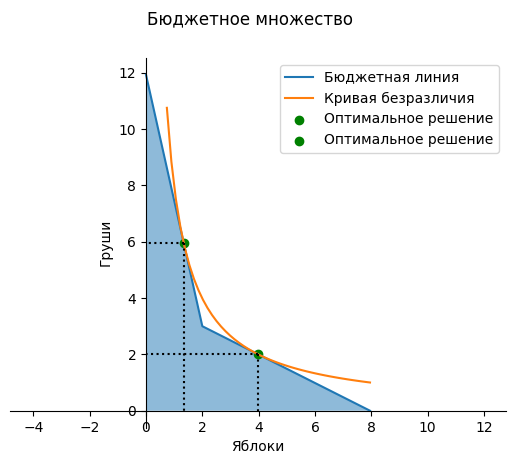

In [55]:
g1 = Good("Яблоки", 2, 10, 5.04)
g2 = Good("Груши", 3, 10, 2.24)
budget = 50
alpha = 0.5
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [53]:
# Подбор параметров для нескольких оптимумов
# t1 = 2
# t2 = 3
# budget = 50
# alpha = 0.5
# p11 = 10
# p21 = 10
# for p12 in range(500, 800):
#     for p22 in range(200, 600):
#         g1 = Good("x", t1, p11, p12 / 100)
#         g2 = Good("y", t2, p21, p22 / 100)
#         a, mu = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
#         if len(a) > 1:
#             print(p12, p22)
#             break
#     else:
#         continue # продолжаем, если внутренний цикл не был прерван
#     break # внутренний цикл был прерван, 
# else:
#     print('nothing')

504 224
